# **Libraries**

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# **Import EMG Feature (CSV file)**

In [32]:
df = pd.read_csv(r"C:\Users\hpalm\Desktop\Programacion\Datos_6000_MYO\Caracteristicas\p01-caracteristicas.csv")
df

,EMAV,EWL,MAV,WL,ZC,SSC,RMS,AAC,DASDV,LD,MMAV,MMAV2,MYOP,SSI,VAR,WAMP,MFL,Label
0,0.249385,16.725057,0.127188,10.500000,28,5,0.174986,0.214286,0.290942,0.0,0.101328,0.101069,0.0,1.531006,0.030615,142,0.308904,0
1,0.345478,22.345027,0.213594,17.648438,30,9,0.278894,0.360172,0.468100,0.0,0.180547,0.181525,0.0,3.889099,0.077713,121,0.515437,0
2,0.348532,20.233636,0.215312,15.507812,27,5,0.286535,0.316486,0.430255,0.0,0.171719,0.168937,0.0,4.105103,0.081774,105,0.478824,0
3,0.198188,11.331826,0.089531,6.460938,24,6,0.133596,0.131856,0.206220,0.0,0.071094,0.070806,0.0,0.892395,0.017807,102,0.159428,0
4,0.165035,9.825415,0.063281,4.921875,28,6,0.086356,0.100446,0.132920,0.0,0.048594,0.046594,0.0,0.372864,0.007408,61,-0.031311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11419,0.064414,2.109120,0.012031,0.453125,2,2,0.014192,0.009247,0.011916,0.0,0.008984,0.008788,0.0,0.010071,0.000085,111,-1.078758,5
11420,0.058943,2.338054,0.010781,0.429688,2,16,0.012742,0.008769,0.010992,0.0,0.007969,0.007856,0.0,0.008118,0.000053,329,-1.113824,5
11421,0.054512,3.082856,0.010313,0.585938,9,4,0.013166,0.011958,0.013346,0.0,0.007656,0.007775,0.0,0.008667,0.000102,178,-1.029542,5
11422,0.056930,3.021143,0.011094,0.648438,9,14,0.013577,0.013233,0.016289,0.0,0.008438,0.008744,0.0,0.009216,0.000110,341,-0.943020,5


# **Correlation matrix between the 17 features**

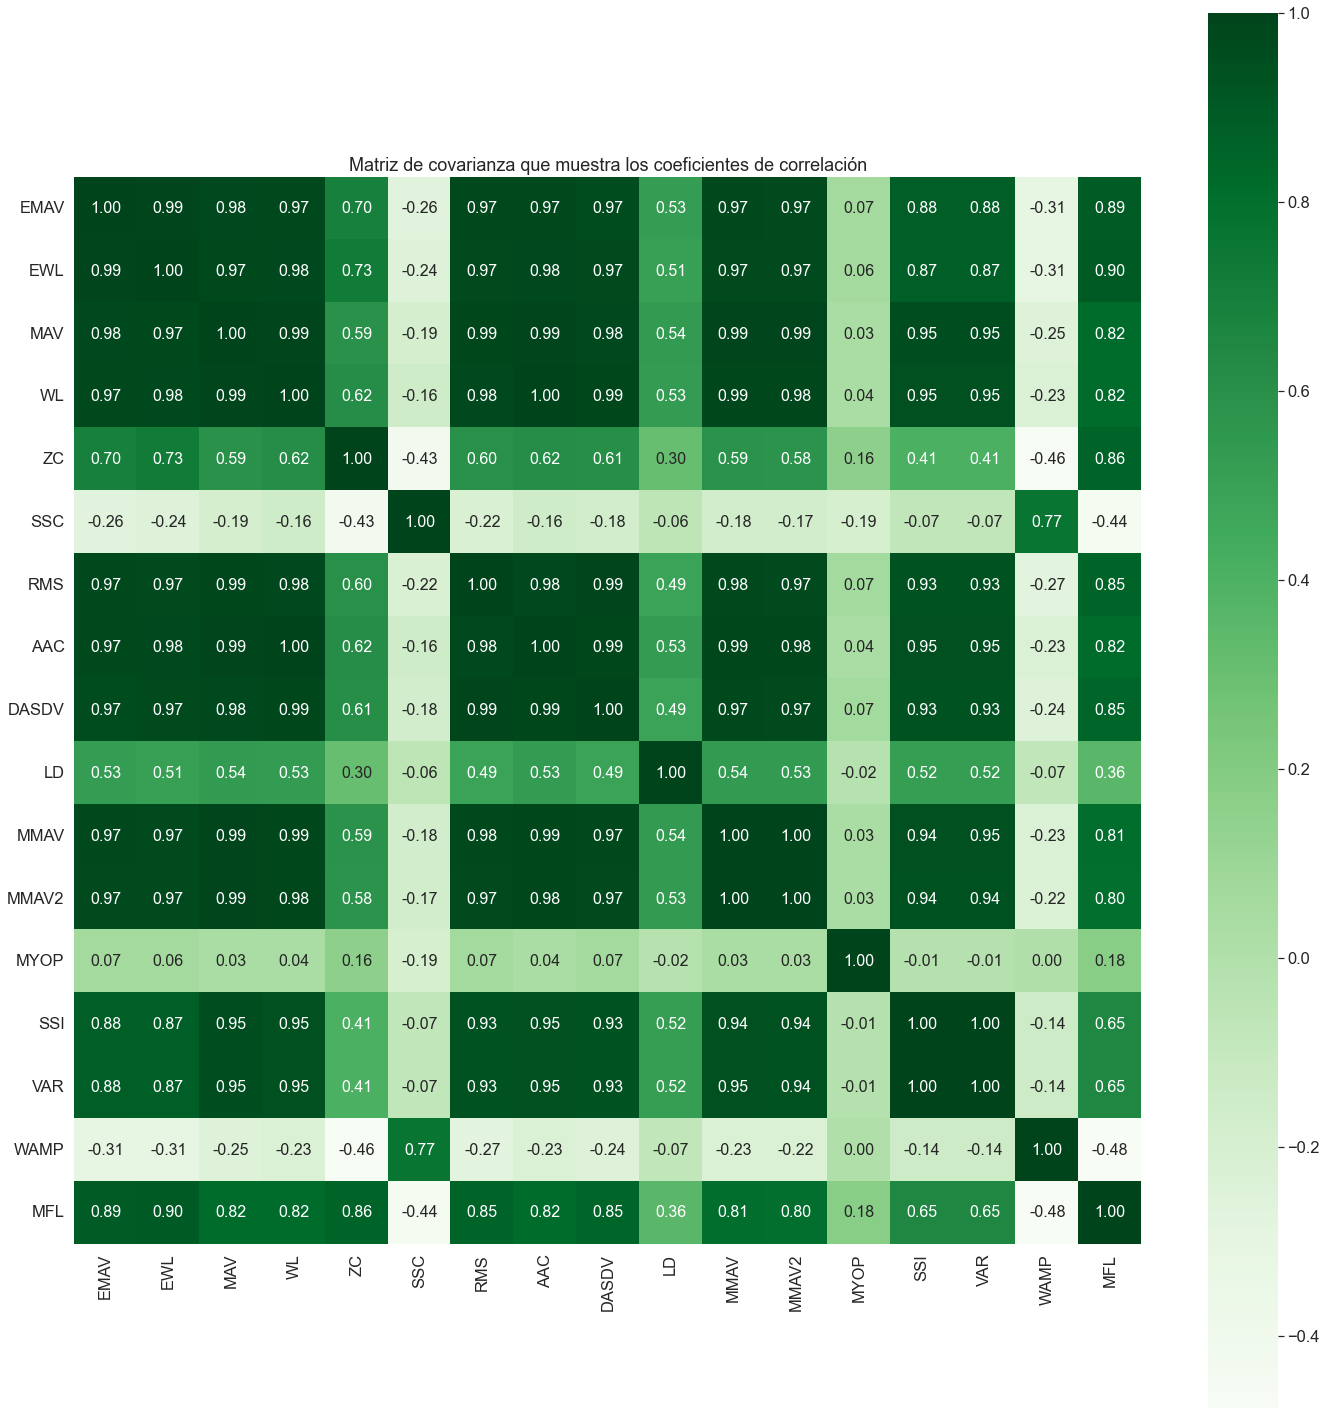

In [33]:
cols = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','WAMP','MFL']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,17)].values)



cov_mat =np.cov(X_std.T)
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=cols,
                 xticklabels=cols,
                 cmap="Greens")

plt.title('Matriz de covarianza que muestra los coeficientes de correlación')
plt.tight_layout()
plt.show()

# **6 chosen features - Pairplot**

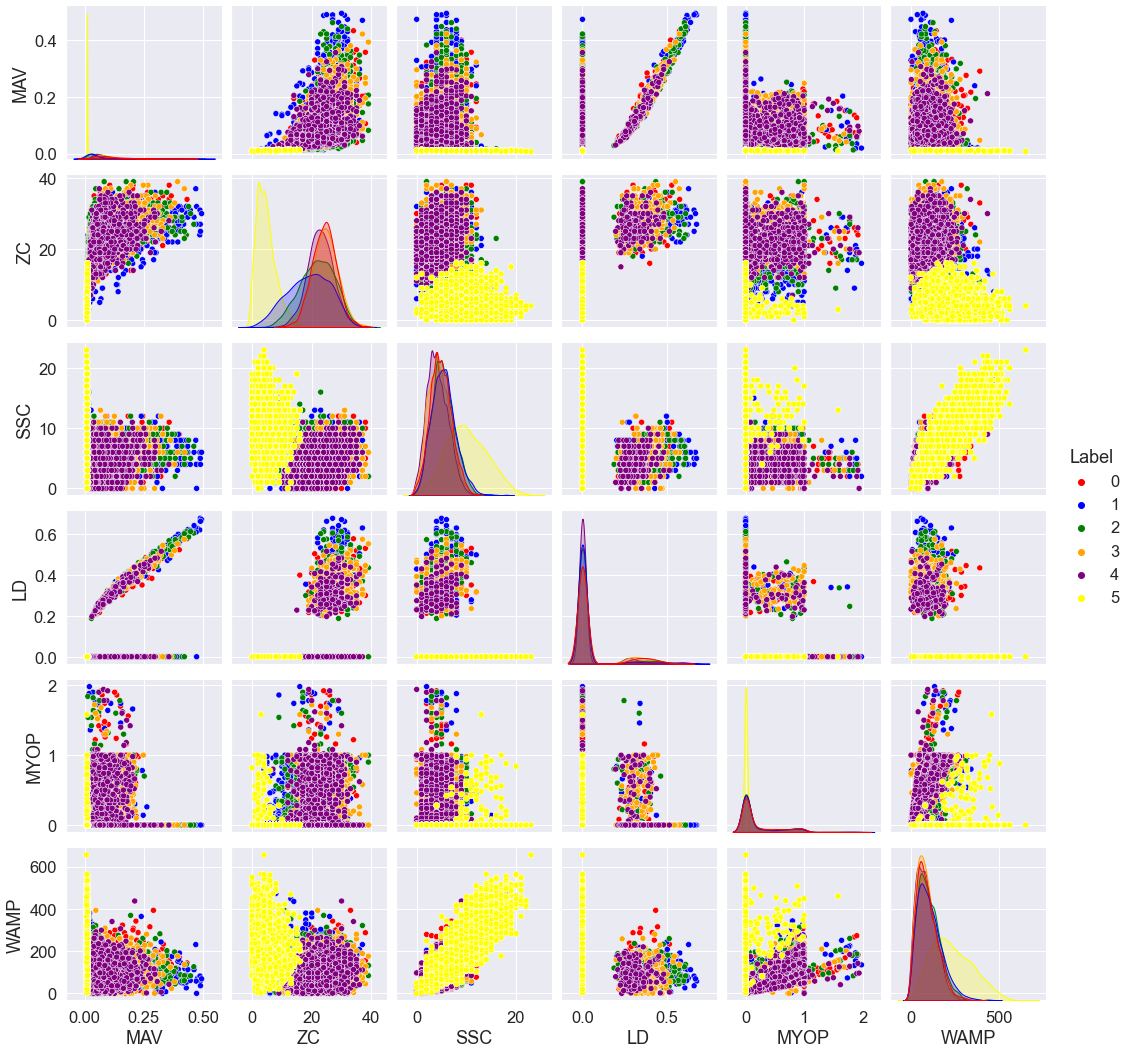

In [34]:
#cols = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','WAMP','MFL','Label']
cols = ['MAV','ZC','SSC','LD', 'MYOP','WAMP','Label']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,5)].values)


# Specify the desired color palette
color_palette = ['red', 'blue', 'green', 'orange','purple','yellow']

g = sns.pairplot(df[cols], hue="Label",palette=color_palette)

# **Train and Test set**

In [35]:
X = df.iloc[:,[2,4,5,9,12,15]].values    # features matrix 
y = df.iloc[:,[17]].values        # target variable

In [36]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Apply PCA
pca = PCA(n_components=5)  # Select the number of components to retain
X_pca = pca.fit_transform(X_scaled)


In [40]:
# Split data into train, test and validatio sets 

X_train, X_test, y_train, y_test= train_test_split(X_pca, y,test_size=0.2,random_state=0, stratify=y)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train,test_size=0.2,random_state=0, stratify=y_train)

print('Testing data shape : ', X_test.shape, y_test.shape)
print('Training data shape : ', X_train.shape, y_train.shape)
print('validation data shape : ', X_val.shape, y_val.shape)

Testing data shape :  (2285, 5) (2285, 1)
Training data shape :  (7311, 5) (7311, 1)
validation data shape :  (1828, 5) (1828, 1)


In [13]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

# **Build ANN and train**

In [41]:
model = Sequential()

model.add(Dense(300, kernel_initializer  = 'uniform', activation='relu', input_shape = (5,)))
model.add(Dense(100, kernel_initializer  = 'uniform', activation='relu'))
model.add(Dense(6, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               1800      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 606       
Total params: 32,506
Trainable params: 32,506
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam',
              metrics=['accuracy'])

In [44]:
# train the ANN model
model_train = model.fit(X_train,y_train,batch_size=10,epochs=20,validation_data=(X_val,y_val)) 

Epoch 1/20
732/732 [==============================] - 1s 1ms/step - loss: 1.3189 - accuracy: 0.4102 - val_loss: 1.3138 - val_accuracy: 0.3796
Epoch 2/20
732/732 [==============================] - 1s 1ms/step - loss: 1.2667 - accuracy: 0.4322 - val_loss: 1.2475 - val_accuracy: 0.4256
Epoch 3/20
732/732 [==============================] - 1s 1ms/step - loss: 1.2567 - accuracy: 0.4371 - val_loss: 1.2367 - val_accuracy: 0.4393
Epoch 4/20
732/732 [==============================] - 1s 1ms/step - loss: 1.2534 - accuracy: 0.4387 - val_loss: 1.2488 - val_accuracy: 0.4480
Epoch 5/20
732/732 [==============================] - 1s 1ms/step - loss: 1.2502 - accuracy: 0.4466 - val_loss: 1.2442 - val_accuracy: 0.4344
Epoch 6/20
732/732 [==============================] - 1s 1ms/step - loss: 1.2462 - accuracy: 0.4496 - val_loss: 1.2333 - val_accuracy: 0.4437
Epoch 7/20
732/732 [==============================] - 1s 1ms/step - loss: 1.2422 - accuracy: 0.4395 - val_loss: 1.2479 - val_accuracy: 0.4289
Epoch 

In [294]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1])) 

Train loss: 1.1843372583389282, Train accuracy: 0.48351797461509705
Test loss: 1.235763430595398, Test accuracy: 0.4617067873477936


# **Confusion Matrix**

In [295]:
predicted_classes2 = model.predict(X_test)

In [296]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [297]:
#rounded_labels = np.argmax(test_Y, axis=1)
rounded_labels = y_test
rounded_labels[5]

array([1], dtype=int64)

In [298]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(rounded_labels,predicted_classes)

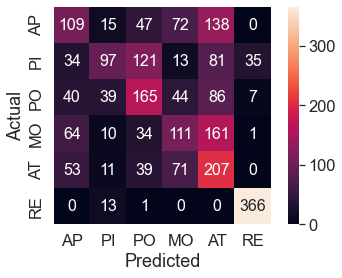

In [299]:
labels=["AP", "PI", "PO", "MO", "AT", "RE"] #Con Reposo
#labels=["AP", "PI", "PO", "MO", "AT"] #Sin Reposo
df_cm = pd.DataFrame(cm, labels, labels)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, square=True, cbar=True, fmt='g')
ax.set_ylim(0, 6) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
ax.invert_yaxis() 
plt.show()

# **Metrics**

In [300]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


poly_accuracy = accuracy_score(rounded_labels, predicted_classes)
poly_f1 = f1_score(rounded_labels, predicted_classes, average='weighted')
poly_recall = recall_score(rounded_labels, predicted_classes, average='macro')
poly_precision = precision_score(rounded_labels, predicted_classes, average='macro')

print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print('Recall_Score (Polynomial Kernel): ', "%.2f" % (poly_recall*100))
print('Precision (Polynomial Kernel): ', "%.2f" % (poly_precision*100))

Accuracy (Polynomial Kernel):  46.17
F1 (Polynomial Kernel):  45.36
Recall_Score (Polynomial Kernel):  46.19
Precision (Polynomial Kernel):  47.54


In [301]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.36      0.29      0.32       381
           1       0.52      0.25      0.34       381
           2       0.41      0.43      0.42       381
           3       0.36      0.29      0.32       381
           4       0.31      0.54      0.39       381
           5       0.89      0.96      0.93       380

    accuracy                           0.46      2285
   macro avg       0.48      0.46      0.45      2285
weighted avg       0.48      0.46      0.45      2285

